In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/lawsdiv`


In [75]:
using Random, Distributions, SpecialFunctions
using Plots, Measures
using LinearAlgebra

In [97]:
include("./models.jl")
using .GenerativeModels

include("./Distributions.jl")
using .PlotDistributions

# Distributions

### Stochastic Logistic model

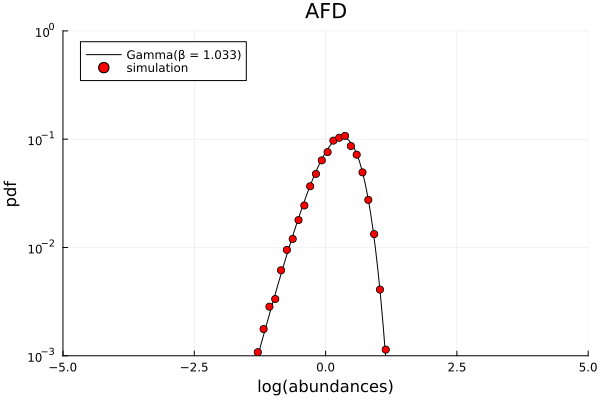

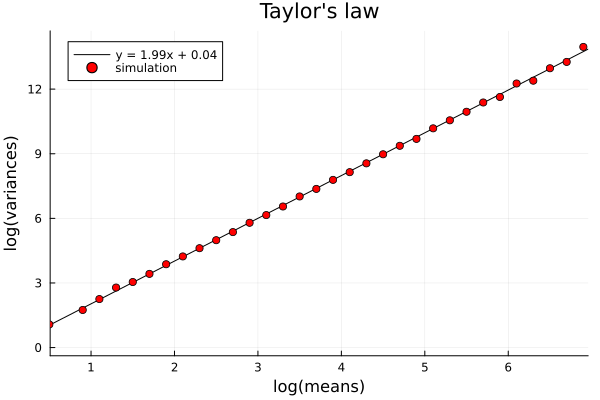

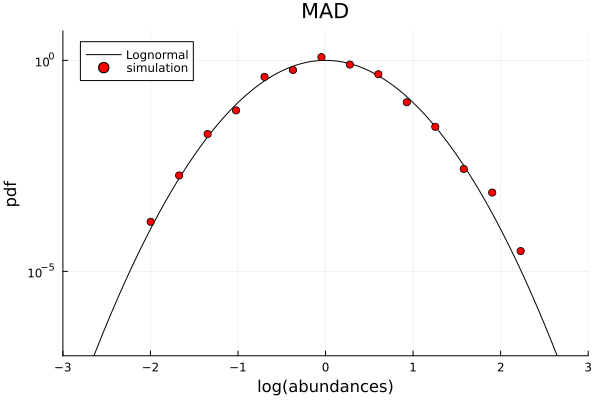

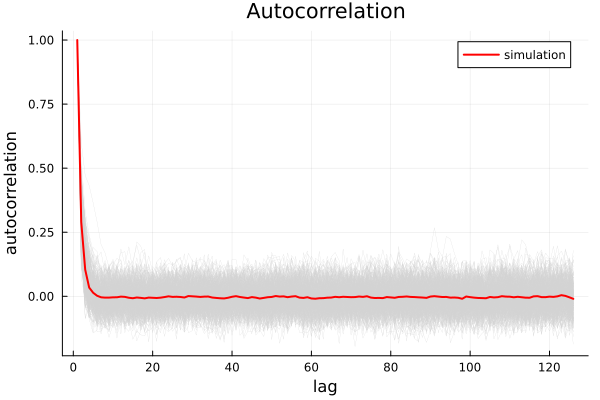

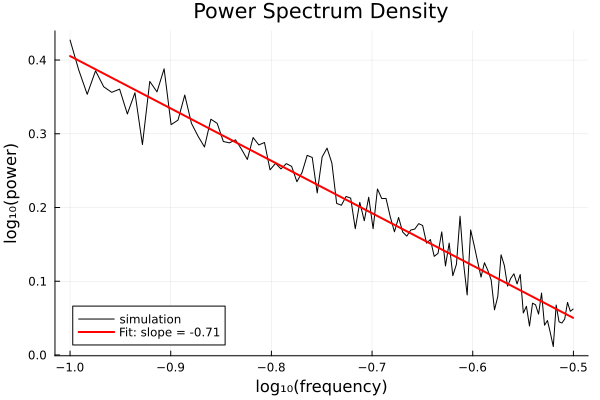

In [4]:
Random.seed!(1234)

# Set parameters
N_species = 500
Δt = 0.1
n = 25000
skip = 1

# Set conditions for temporal analysis
K = 100 .* rand(LogNormal(), N_species)
# Pass y0 = K to the model so it is already at staedy state

# Solve model
data = GenerativeModels.logistic_growth(N_species, K, Δt, n; r=1.0, K=K, σ=1.0, skip=50)

# Compute distributions
max_lag = Int64(floor(size(data, 1) / 4))
afd = PlotDistributions.make_AFD(data; Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; Δb=0.2, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; Δb=0.5, plot_fig=true, plot_title="MAD", data_label="simulation")
lagcorr = PlotDistributions.make_lagCorr(data; max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Autocorrelation", data_label="simulation")
psd = PlotDistributions.make_PSD(data; freq_range=(-1.0, -0.5), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

display(afd["fig"])
# savefig("./Images/SLM_AFD.png")
display(taylor["fig"])
# savefig("./Images/SLM_Taylor.png")
display(mad["fig"])
# savefig("./Images/SLM_MAD.png")
display(lagcorr["fig"])
# savefig("./Images/SLM_autocorr.png")
display(psd["fig"])
# savefig("./Images/SLM_PSD.png")

### Stochastic Exponential Growth

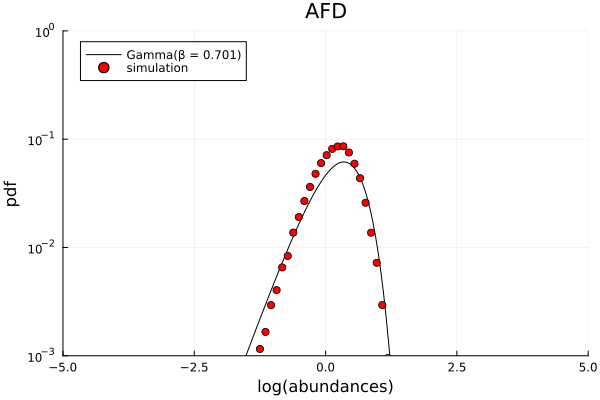

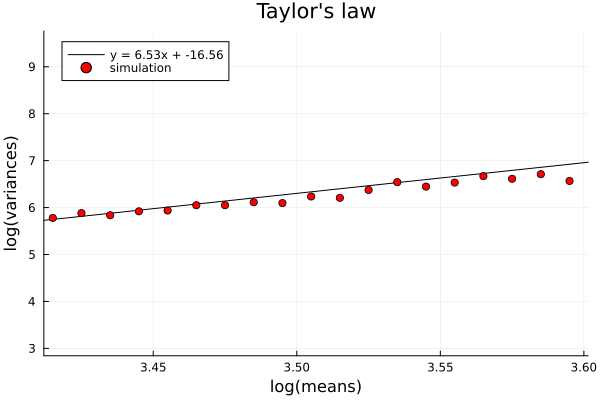

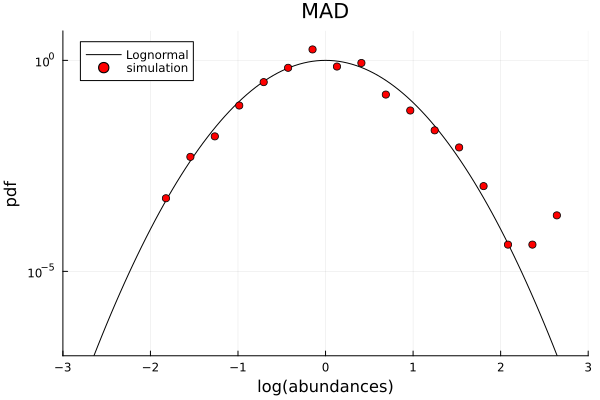

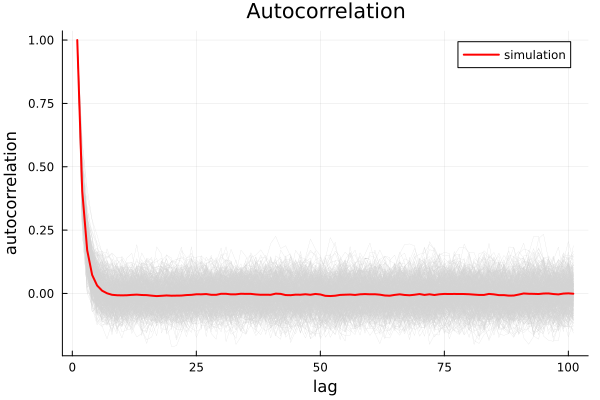

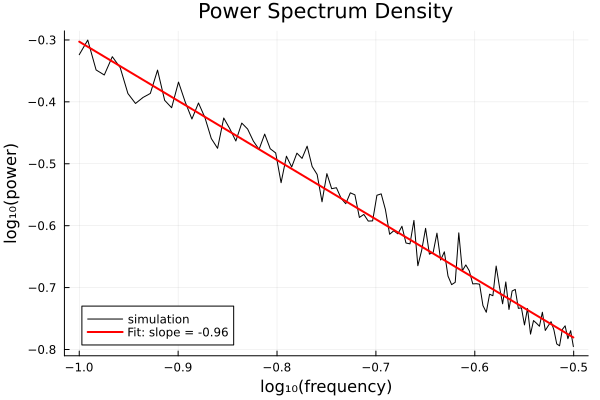

In [126]:
Random.seed!(1234)

# Set parameters
N_species = 500
Δt = 0.1
n = 25000
skip = 1

# Set conditions for temporal analysis
y0 = 100 .* abs.(rand(Normal(), N_species))
# y0 = 100 .* rand(N_species)
# y0 = 100 .* rand(LogNormal(), N_species)

# Solve model
data = GenerativeModels.exp_growth(N_species, y0, Δt, n; σ=1.0, p=0.0, skip=50)

# Compute distributions
max_lag = Int64(floor(size(data, 1) / 5))
afd = PlotDistributions.make_AFD(data; Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; Δb=0.01, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; Δb=0.02, plot_fig=true, plot_title="MAD", data_label="simulation")
lagcorr = PlotDistributions.make_lagCorr(data; max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Autocorrelation", data_label="simulation")
psd = PlotDistributions.make_PSD(data; freq_range=(-1.0, -0.5), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

display(afd["fig"])
# savefig("./Images/SLM_AFD.png")
display(taylor["fig"])
# savefig("./Images/SLM_Taylor.png")
display(mad["fig"])
# savefig("./Images/SLM_MAD.png")
display(lagcorr["fig"])
# savefig("./Images/SLM_autocorr.png")
display(psd["fig"])
# savefig("./Images/SLM_PSD.png")

### Stochastic Lotka Volterra

In [104]:
include("./models.jl")
using .GenerativeModels

include("./Distributions.jl")
using .PlotDistributions

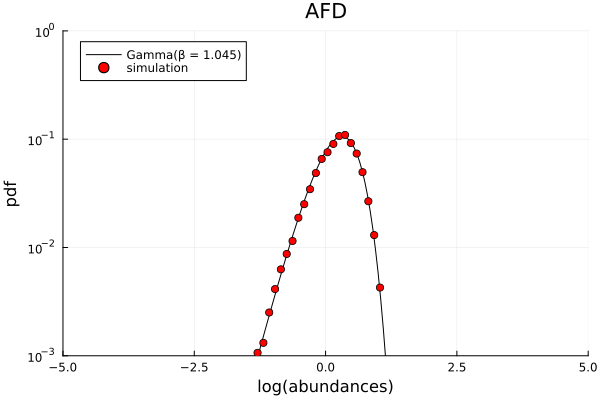

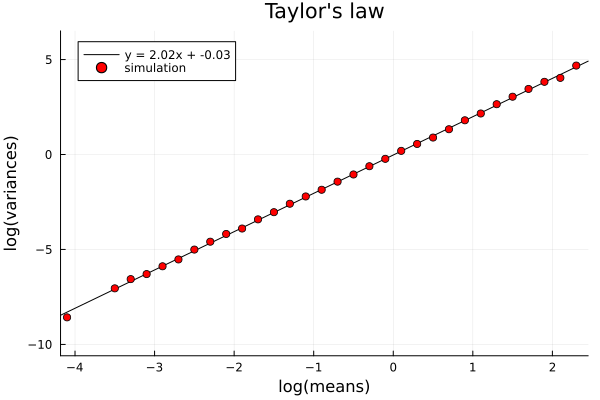

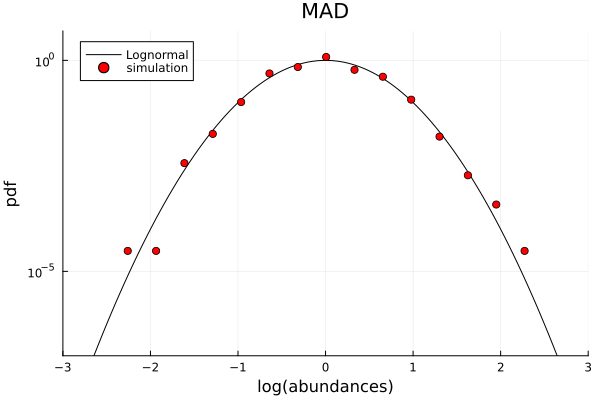

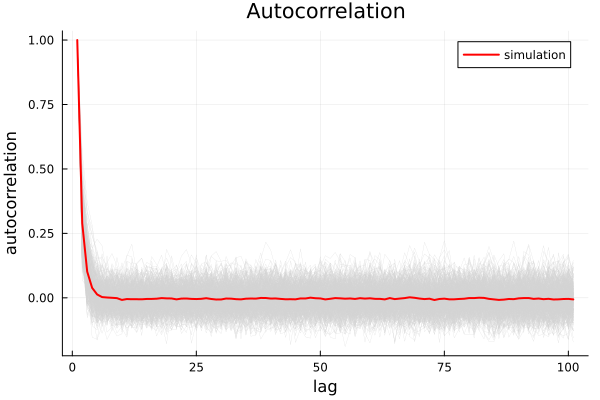

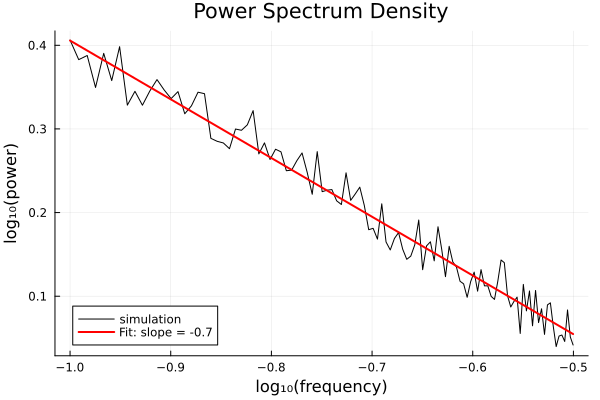

In [143]:
Random.seed!(1234)

# Set parameters
N_species = 500
Δt = 0.1
n = 25000
skip = 1

# Set conditions for temporal analysis
K = rand(LogNormal(), N_species)
A = GenerativeModels.sparse_gaussian_matrix(K, 1e-4; μ=-2/N_species, σ=1/sqrt(N_species))

# Solve model
data = GenerativeModels.lotka_volterra(N_species, K, Δt, n; r=1.0, A=Matrix(A), σ=1.0, skip=50)

# Compute distributions
max_lag = Int64(floor(size(data, 1) / 5))
afd = PlotDistributions.make_AFD(data; Δb=0.2, plot_fig=true, plot_title="AFD", data_label="simulation")
taylor = PlotDistributions.make_Taylor(data; Δb=0.2, plot_fig=true, plot_title="Taylor's law", data_label="simulation")
mad = PlotDistributions.make_MAD(data; Δb=0.5, plot_fig=true, plot_title="MAD", data_label="simulation")
lagcorr = PlotDistributions.make_lagCorr(data; max_lag=max_lag, make_log=true, plot_fig=true, plot_title="Autocorrelation", data_label="simulation")
psd = PlotDistributions.make_PSD(data; freq_range=(-1.0,-0.5), make_log=true, plot_fig=true, plot_title="Power Spectrum Density", data_label="simulation")

display(afd["fig"])
# savefig("./Images/SLM_AFD.png")
display(taylor["fig"])
# savefig("./Images/SLM_Taylor.png")
display(mad["fig"])
# savefig("./Images/SLM_MAD.png")
display(lagcorr["fig"])
# savefig("./Images/SLM_autocorr.png")
display(psd["fig"])
# savefig("./Images/SLM_PSD.png")